# Statystyka praktyczna w data science (Python)
# Rozdział 2. Rozkłady danych i prób
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

Importuje wymagane pakiety Pythona.

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

DATA = Path('.').resolve().parents[1] / 'dane'

Definiuje ścieżki do zestawów danych. Jeżeli przechowujesz dane w innym katalogu, wprowadź poniżej stosowne zmiany.

In [2]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

Rysunek 2.1

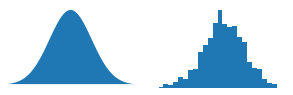

In [3]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

# Rozkład próbkowania dla statystyki

In [4]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

sample_data = pd.DataFrame({
    'dochód': loans_income.sample(1000),
    'typ': 'Dane',
})

sample_mean_05 = pd.DataFrame({
    'dochód': [loans_income.sample(5).mean() for _ in range(1000)],
    'typ': 'Średnia z 5',
})

sample_mean_20 = pd.DataFrame({
    'dochód': [loans_income.sample(20).mean() for _ in range(1000)],
    'typ': 'Średnia z 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         dochód   typ
40292   63000.0  Dane
38959   92000.0  Dane
17361  134000.0  Dane
33996   52000.0  Dane
26491   43000.0  Dane


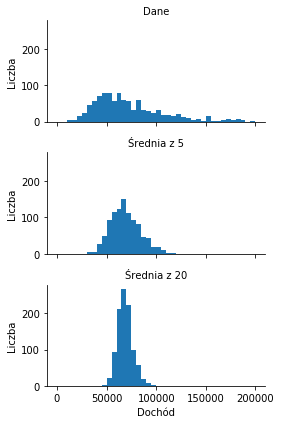

In [5]:
g = sns.FacetGrid(results, col='typ', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'dochód', range=[0, 200000], bins=40)
g.set_axis_labels('Dochód', 'Liczba')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

# Próby bootstrapowe

In [6]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Statystyki bootstrapowe:')
print(f'Pierwotne: {loans_income.median()}')
print(f'Obciążenie: {results.mean() - loans_income.median()}')
print(f'Błąd standardowy: {results.std()}')

Statystyki bootstrapowe:
Pierwotne: 62000.0
Obciążenie: -82.09799999999814
Błąd standardowy: 228.73933106830748


# Przedziały ufności

68760.51844
55734.1


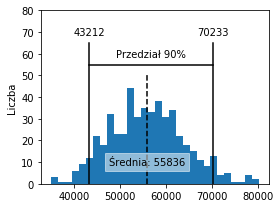

In [7]:
print(loans_income.mean())
np.random.seed(seed=3)  
# tworzy próbę składającą się z 20 punktów danych
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, 'Przedział 90%',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Średnia: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Liczba')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Liczba')

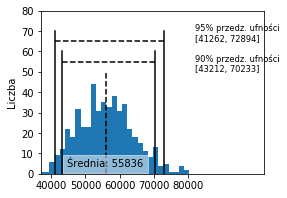

In [9]:
np.random.seed(seed=3)
# tworzy próbę składającą się z 20 punktów danych
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% przedz. ufności\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% przedz. ufności\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % przedz. ufności',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Średnia: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Liczba')

# plt.tight_layout()
# plt.show()

# Rozkład normalny
## Standaryzowany rozkład normalny i wykres K-K
Pakiet _scipy_ zawiera funkcję (`scipy.stats.probplot`) tworzącą wykresy K-K. Argument `dist` określa rozkład (domyślnie. jest to rozkład normalny).

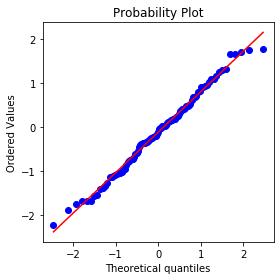

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

# Rozkłady z długimi ogonami

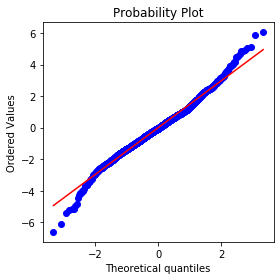

In [12]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

# Rozkład binarny

In [13]:
print(stats.binom.pmf(2, n=5, p=0.1))

0.0729


In [14]:
print(stats.binom.cdf(2, n=5, p=0.1))

0.99144


# Rozkład Poissona i jego pochodne
## Rozkład Poissona

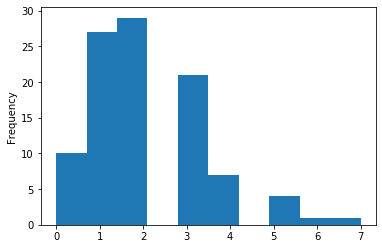

In [15]:
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

## Rozkład wykładniczy

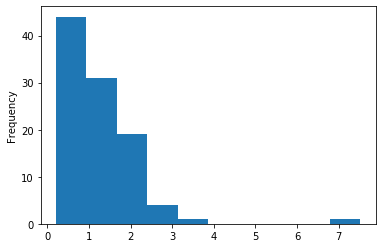

In [16]:
sample = stats.expon.rvs(0.2, size=100)

pd.Series(sample).plot.hist()
plt.show()

##  Rozkład Weibulla

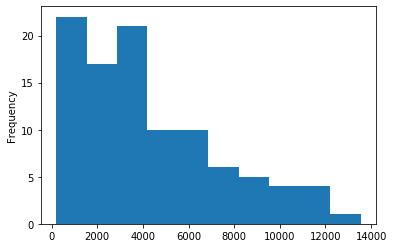

In [17]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()